<a href="https://colab.research.google.com/github/Thusharkanth/machine_learning_CW/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
# upload the file to colab

from google.colab import files
uploaded = files.upload()

# Loading the data set  with correct delimeter

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, sep = ';')

Saving bank-full.csv to bank-full.csv


In [4]:
# understanding the data

print ('First 5 rows of the dataset : ')
print (df.head())

# checking the sdata type

print("\n Dataset info ........... \n")
print(df.info())

#Statisitical summary of the numerial data

print("\n Statistical summary of the numerical data .......\n")
print(df.describe())

First 5 rows of the dataset : 
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

 Dataset info ........... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4

In [5]:
# handling the missing values
# Replacing the value 'unknow' to NaN for easy handling

df.replace ('unknown', np.nan, inplace=True)

# checking the missing value

print ("\n Missing Values per coloumn .............\n")
print (df.isnull().sum())

# Drop rows with cirital missing value (job , education )
# since we have large data and the missing value is small part the information loss is less than 0.64% and 4.22% respectivitly

df.dropna(subset =['job','education'], inplace= True )

print ('\n Missing value after droppping \n ')
print (df.isnull().sum())


# Filling missing values for 'contact' and 'poutcome' with mode
df['contact'] = df['contact'].fillna(df['contact'].mode()[0])  # Assign after filling
df['poutcome'] = df['poutcome'].fillna(df['poutcome'].mode()[0])  # Assign after filling

# Check for missing values again to confirm
print("\nMissing Values after Filling:")
print(df.isnull().sum())



 Missing Values per coloumn .............

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

 Missing value after droppping 
 
age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact      12286
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     35286
y                0
dtype: int64

Missing Values after Filling:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous

In [6]:
# encoding the Categorical varible
# convert the binary values to 0/1

binary_columns =[ 'default','housing', 'loan']
for col in binary_columns:
  df[col] = df[col].map({'yes':1, 'no':0})

# one-hot encoding categorical varibles

df = pd.get_dummies(df, columns=['job','marital', 'education','contact', 'poutcome','month'], drop_first=True)

# showing encodedd date
print ('\n Encoded data \n')
print (df.head)


 Encoded data 

<bound method NDFrame.head of        age  default  balance  housing  loan  day  duration  campaign  pdays  \
0       58        0     2143        1     0    5       261         1     -1   
1       44        0       29        1     0    5       151         1     -1   
2       33        0        2        1     1    5        76         1     -1   
5       35        0      231        1     0    5       139         1     -1   
6       28        0      447        1     1    5       217         1     -1   
...    ...      ...      ...      ...   ...  ...       ...       ...    ...   
45206   51        0      825        0     0   17       977         3     -1   
45207   71        0     1729        0     0   17       456         2     -1   
45208   72        0     5715        0     0   17      1127         5    184   
45209   57        0      668        0     0   17       508         4     -1   
45210   37        0     2971        0     0   17       361         2    188   

    

In [7]:
# Converting the traget column (y) into binary fromate

df['y'] = df['y'].map({'yes':1, 'no':0})

# check the traget column
print ('\n Traget column \n')
print (df['y'])



 Traget column 

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 43193, dtype: int64


In [8]:
# normalize/ Standardize the numarial features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# selkec numaerial coloums for scale
numerical_features =['age','balance', 'duration', 'campaign','pdays', 'previous']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# display the scaled featuer
print ('\n Scaled data \n')
print (df[numerical_features].head())


 Scaled data 

        age   balance  duration  campaign     pdays  previous
0  1.639561  0.259354  0.010368 -0.573827 -0.412311  -0.25073
1  0.307816 -0.435568 -0.415726 -0.573827 -0.412311  -0.25073
2 -0.738556 -0.444443 -0.706245 -0.573827 -0.412311  -0.25073
5 -0.548306 -0.369166 -0.462209 -0.573827 -0.412311  -0.25073
6 -1.214179 -0.298161 -0.160070 -0.573827 -0.412311  -0.25073


In [9]:
# spilting the dataset

from sklearn.model_selection import train_test_split

X = df.drop(columns=['y'])  # features
y = df['y']    # traget varible

# Split into tarimg 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Testing Set Sizes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Training and Testing Set Sizes:
X_train: (34554, 38), X_test: (8639, 38)
y_train: (34554,), y_test: (8639,)


In [10]:
print(df['y'].isnull().sum())

print(y_train.isnull().sum())
print(y_test.isnull().sum())

print(df.head())


0
0
0
        age  default   balance  housing  loan  day  duration  campaign  \
0  1.639561        0  0.259354        1     0    5  0.010368 -0.573827   
1  0.307816        0 -0.435568        1     0    5 -0.415726 -0.573827   
2 -0.738556        0 -0.444443        1     1    5 -0.706245 -0.573827   
5 -0.548306        0 -0.369166        1     0    5 -0.462209 -0.573827   
6 -1.214179        0 -0.298161        1     1    5 -0.160070 -0.573827   

      pdays  previous  ...  month_dec  month_feb  month_jan  month_jul  \
0 -0.412311  -0.25073  ...      False      False      False      False   
1 -0.412311  -0.25073  ...      False      False      False      False   
2 -0.412311  -0.25073  ...      False      False      False      False   
5 -0.412311  -0.25073  ...      False      False      False      False   
6 -0.412311  -0.25073  ...      False      False      False      False   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0      False      False       True

In [11]:
# handling class imbalance

from imblearn.over_sampling import SMOTE

smote =  SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# after balancing --display

print("\nAfter Balancing:")
print(y_train_resampled.value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



After Balancing:
y
1    30514
0    30514
Name: count, dtype: int64


In [12]:
# Save the preprocessed data
X_train_path = 'X_train_resampled.csv'
X_test_path = 'X_test.csv'
y_train_path = 'y_train_resampled.csv'
y_test_path = 'y_test.csv'

X_train_resampled.to_csv(X_train_path, index=False)
X_test.to_csv(X_test_path, index=False)
y_train_resampled.to_csv(y_train_path, index=False)
y_test.to_csv(y_test_path, index=False)

print("Preprocessed data saved to CSV files.")

# Import the files module from Google Colab
from google.colab import files

# Download the saved files
print("\nDownloading files to your local machine...")
files.download(X_train_path)
files.download(X_test_path)
files.download(y_train_path)
files.download(y_test_path)


Preprocessed data saved to CSV files.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

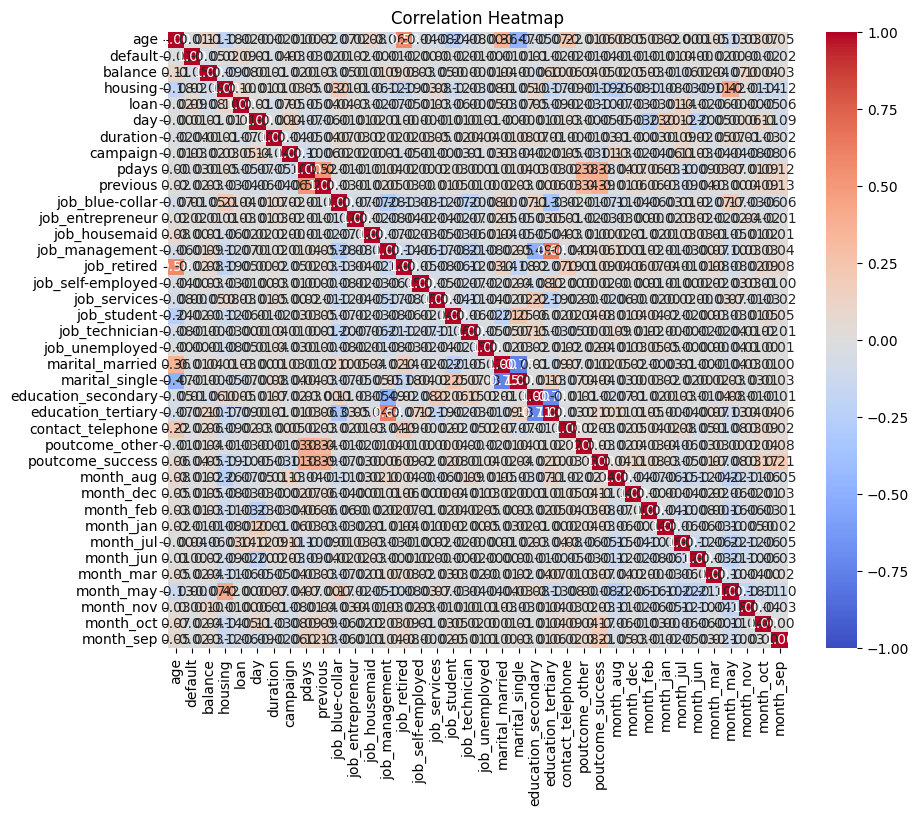

In [13]:
# feature selection part

import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
X_train_selection = pd.read_csv('X_train_resampled.csv')

# compute the correlation matrixs
corr_matrix = X_train_selection.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",  vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()


In [14]:
# implementing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# intialize the Random foreset Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model using the training dataset

rf_model.fit(X_train_resampled, y_train_resampled)

# make predictions on the test dataset

y_predict_rf = rf_model.predict(X_test)

print ('Random Forest Classifier \n')

# calculate the accuracy
accuracy = accuracy_score(y_test, y_predict_rf)*100
print(f"Accuracy: {accuracy:.2f}% \n")

# calculate the Precision
precision = precision_score(y_test, y_predict_rf) * 100
print(f"Precision: {precision:.2f}% \n")

# calculate the Recall
recall = recall_score(y_test, y_predict_rf) * 100
print(f"Recall: {recall:.2f}% \n")

# calculate f1 - score
f1 = f1_score(y_test, y_predict_rf) * 100
print(f"F1-Score: {f1:.2f}% \n")

# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_predict_rf)*100
print(f"ROC-AUC Score: {roc_auc:.2f}% \n")

# calculate the Confusion matrixs
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predict_rf))


Random Forest Classifier 

Accuracy: 89.54% 

Precision: 53.47% 

Recall: 60.55% 

F1-Score: 56.79% 

ROC-AUC Score: 76.90% 

Confusion Matrix:
 [[7141  517]
 [ 387  594]]


In [15]:
# implementing Neuraal netwirk

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# intizializing the Netural newtow

nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train_resampled.shape[1], activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# compile the model

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# train the model
nn_model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# make predictions on the test dataset
y_predict_nn = (nn_model.predict(X_test) >0.5).astype("int32")

# eveluate the Nural network
print ('Neuraal Network Classifier \n')

# calculate the accuracy
accuracy = accuracy_score(y_test, y_predict_nn)*100
print(f"Accuracy: {accuracy:.2f}% \n")

# calculate the Precision
precision = precision_score(y_test, y_predict_nn) * 100
print(f"Precision: {precision:.2f}% \n")

# calculate the Recall
recall = recall_score(y_test, y_predict_nn) * 100
print(f"Recall: {recall:.2f}% \n")

# calculate f1 - score
f1 = f1_score(y_test, y_predict_nn) * 100
print(f"F1-Score: {f1:.2f}% \n")

# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_predict_nn)
print(f"ROC-AUC Score: {roc_auc:.2f}% \n")

# calculate the Confusion matrixs
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predict_nn))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1526/1526 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7837 - loss: 0.4553 - val_accuracy: 0.9238 - val_loss: 0.2310
Epoch 2/20
1526/1526 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8732 - loss: 0.2953 - val_accuracy: 0.8987 - val_loss: 0.2885
Epoch 3/20
1526/1526 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8784 - loss: 0.2810 - val_accuracy: 0.9168 - val_loss: 0.2322
Epoch 4/20
1526/1526 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8841 - loss: 0.2679 - val_accuracy: 0.9088 - val_loss: 0.2445
Epoch 5/20
1526/1526 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8901 - loss: 0.2567 - val_accuracy: 0.9354 - val_loss: 0.1917
Epoch 6/20
1526/1526 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8908 - loss: 0.2533 - val_accuracy: 0.8724 - val_loss: 0.3055
Epoch 7/20
1526/1526 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8944 - loss: 0.2472 - val_accuracy: 0.9146 - val_loss: 0.2255
Epoch 8/20
1526/1526 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8942 - loss: 0.2427 

270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


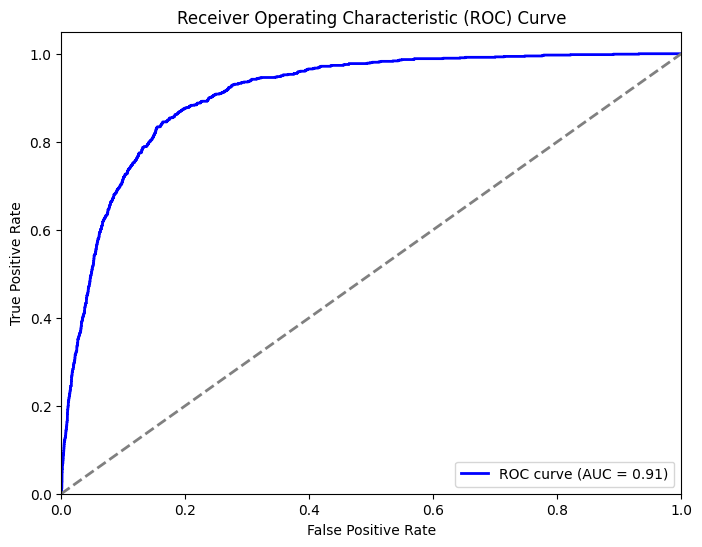

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_prob_nn = nn_model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nn)

# Compute the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


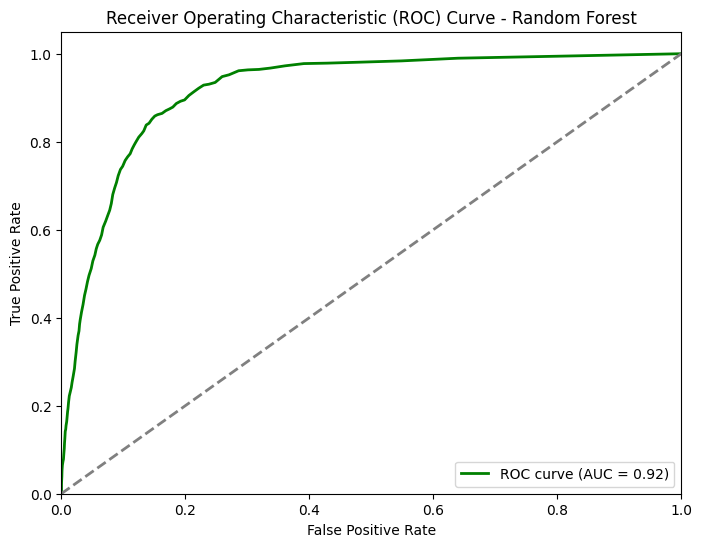

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Compute the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()
